In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patheffects as path_effects
import matplotlib.gridspec as gridspec

In [2]:
start_year = 1975
end_year = 2021

columns = ['IMAGE Region Name', 'time', 'NGFBFC']

colors = {'plant based fibres': '#4D869C',
          'non food, luxury, spices': '#7AB2B2',
          'vegetables & fruits': '#CDE8E5',
          'palm oil': '#FC4100',
          'sugar crops': '#FFC55A',
          'tropical roots & tubers': '#8E3E63',
          'temperate roots & tubers': '#D2649A',
          'tropical oil crops': '#03AED2',
          'temperate oil crops': '#68D2E8',
          'soybeans': '#5F6F52',
          'pulses': '#A9B388',
          'temperate cereals': '#FC819E',
          'tropical cereals': '#F7418F',
          'maize': '#FFF455',
          'rice': '#FFEFEF',
          'wheat': '#F7C566'}

In [4]:
def ngfbfc_processing(df):
    try:
        if "type" in df.columns.to_list():
            df = df.rename(columns={"type": "NGFBFC"}) 

        if 'NGFBFC' in df.columns:
            df['NGFBFC'] = df['NGFBFC'].str.lower()
            df['NGFBFC'] = df['NGFBFC'].replace("oil & palm fruit", "palm oil")
            df['NGFBFC'] = df['NGFBFC'].replace("other non-food & luxury & spices", "non food, luxury, spices")
            df['NGFBFC'] = df['NGFBFC'].replace('other temperate cereals', 'temperate cereals')
        return df
    except Exception as e:
        print(f"error: {e}")
        return df

def region_processing(df):
    try:
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
        df['IMAGE Region Name'] = df['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
        return df
    except Exception as e:
        print(f"error: {e}")
        return df

def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0


def get_top_n(df, category_col, value_col, n=3):
    return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)

def get_angular_position(NGFBFC_name, NGFBFCs_list):
    """Calculate the angular position of a NGFBFC in the chart"""
    idx = NGFBFCs_list.index(NGFBFC_name)
    return (idx * 360.0 / len(NGFBFCs_list) + 90) % 360

In [12]:
GECH4RI = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECH4RI_rice_category_annual_gtco2eq.xlsx")
GECO2AB_CH4 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECO2AB_crop_category_annual_gtco2eq_CH4_13Jan.xlsx")
GECO2AB_N2O = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GECO2AB_crop_category_annual_gtco2eq_N2O_13Jan.xlsx")
GEC2OLC = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GEN2OLC_crop_category_annual_gtco2eq.xlsx")
GEN2ORE = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GEN2ORE_crop_category_annual_gtco2eq_13Jan.xlsx")
GFERTYN = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GFERTSYN_crop_category_annual_gtco2eq.xlsx")
GMANURE = pd.read_excel("D:/kerja/asisten riset/code v/review/data/GMANURE_crop_category_annual_gtco2eq.xlsx")
LUC_agri = pd.read_excel("D:/kerja/asisten riset/code v/review/data/LUC_agri_crop_category_annual_gtco2eq.xlsx")
agri_to_agri = pd.read_excel("D:/kerja/asisten riset/code v/review/data/agri2agri_crop_category_annual_gtco2eq.xlsx")
peat_CH4 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_CH4_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_CO2 = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_CO2_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_DOC = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_DOC_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_N2O = pd.read_excel("D:/kerja/asisten riset/code v/review/data/peat_N2O_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
country_code = pd.read_excel("D:/kerja/asisten riset/FULL_RUN/INPUT_DATA/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

In [7]:
GECH4RI = ngfbfc_processing(GECH4RI)
GECO2AB_CH4 = ngfbfc_processing(GECO2AB_CH4)
GECO2AB_N2O = ngfbfc_processing(GECO2AB_N2O)
GEC2OLC = ngfbfc_processing(GEC2OLC)
GEN2ORE = ngfbfc_processing(GEN2ORE)
GFERTYN = ngfbfc_processing(GFERTYN)
GMANURE = ngfbfc_processing(GMANURE)
LUC_agri = ngfbfc_processing(LUC_agri)
agri_to_agri = ngfbfc_processing(agri_to_agri)

peat_CH4 = ngfbfc_processing(peat_CH4)
peat_CO2 = ngfbfc_processing(peat_CO2)
peat_DOC = ngfbfc_processing(peat_DOC)
peat_N2O = ngfbfc_processing(peat_N2O)

all_sources = pd.concat([LUC_agri, GEC2OLC, GECH4RI, GECO2AB_CH4, GECO2AB_N2O, GEN2ORE, GFERTYN, GMANURE, peat_CH4, peat_CO2, peat_DOC, peat_N2O, agri_to_agri], ignore_index=True)
all_sources.loc[:, range(start_year, end_year, 5)] = all_sources.loc[:, range(start_year, end_year, 5)] * 5

In [8]:
df_LUC = all_sources[(all_sources['emissions'] == 'Land use change') | (all_sources['emissions'] == 'GEN2OLC')]
df_LUC = df_LUC.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_LUC = df_LUC.reset_index()
df_LUC = df_LUC.drop(columns=['emissions'])
df_LUC.loc[:, range(start_year, end_year, 5)] = df_LUC.loc[:, range(start_year, end_year, 5)] * 5

df_AGRI = all_sources[~(all_sources['emissions'] == 'Land use change') & ~(all_sources['emissions'] == 'GEN2OLC')]
df_AGRI = df_AGRI.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_AGRI = df_AGRI.reset_index()
df_AGRI = df_AGRI.drop(columns=['emissions'])
df_AGRI.loc[:, range(start_year, end_year, 5)] = df_AGRI.loc[:, range(start_year, end_year, 5)] * 5

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


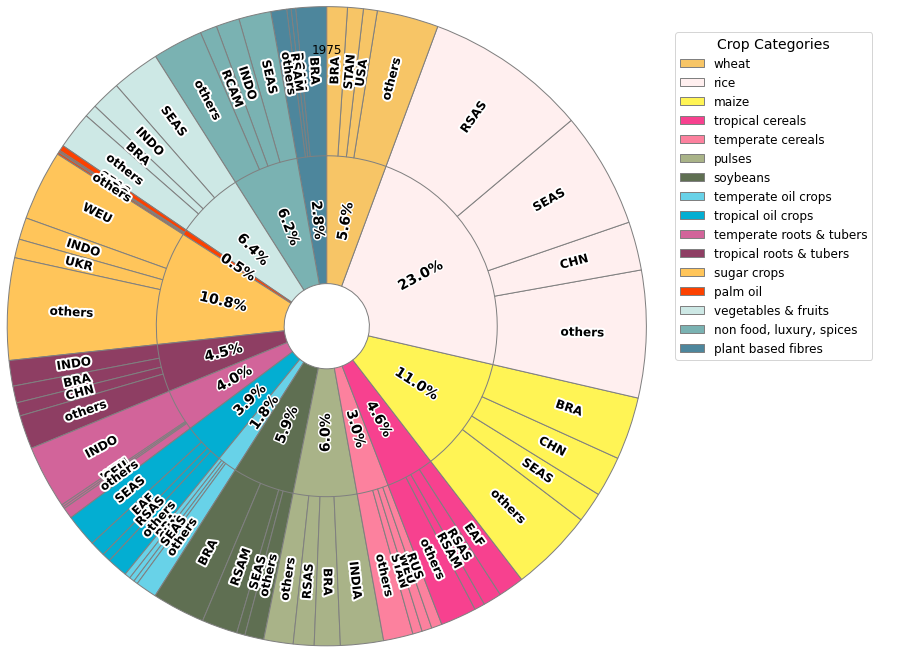

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


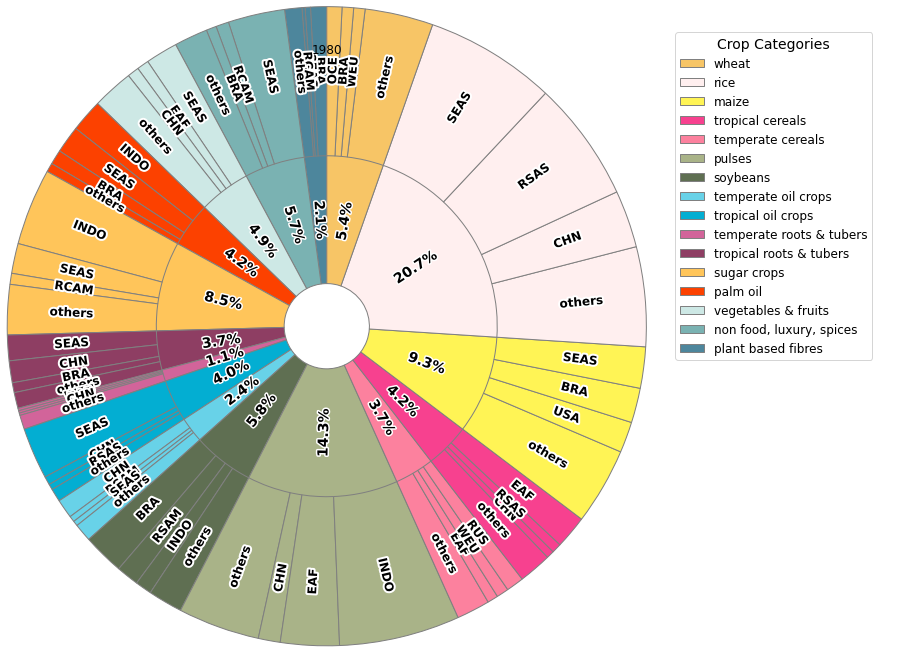

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


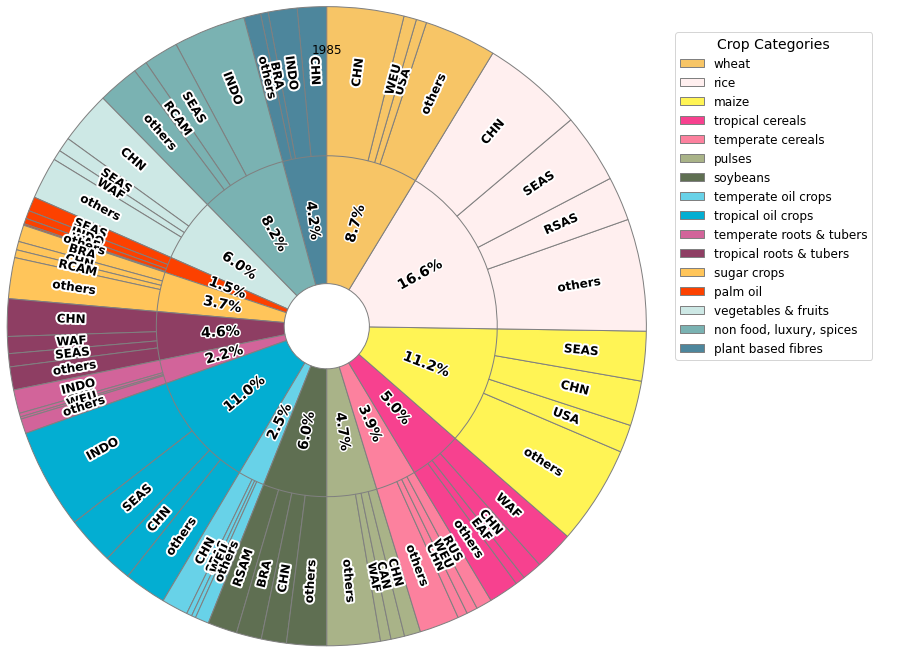

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


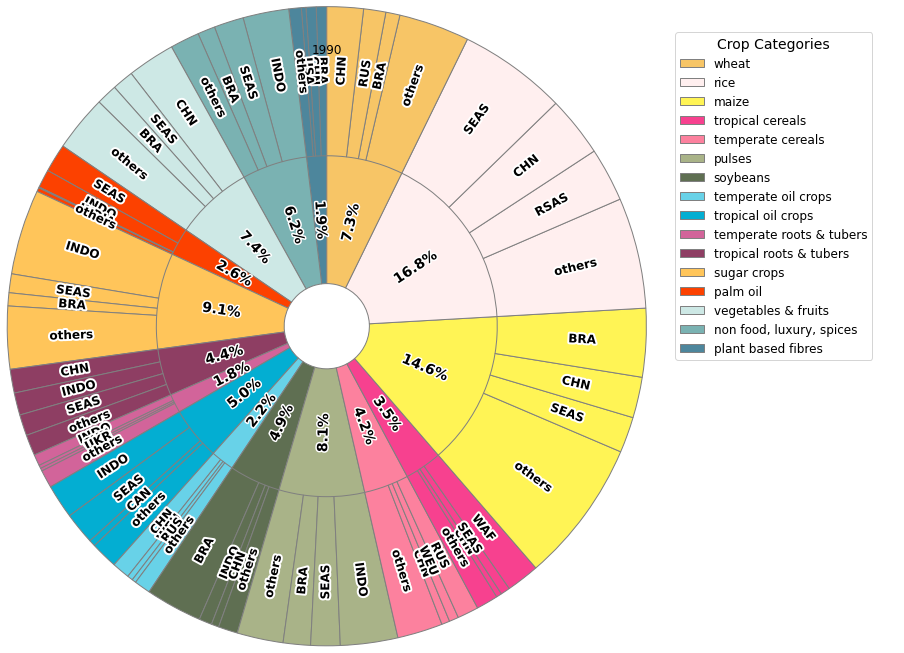

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


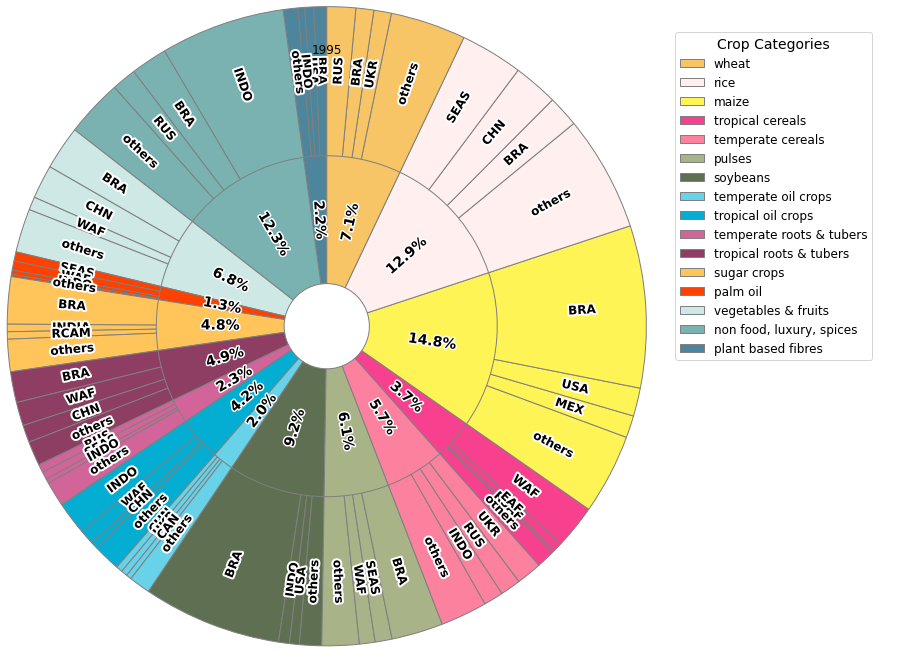

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


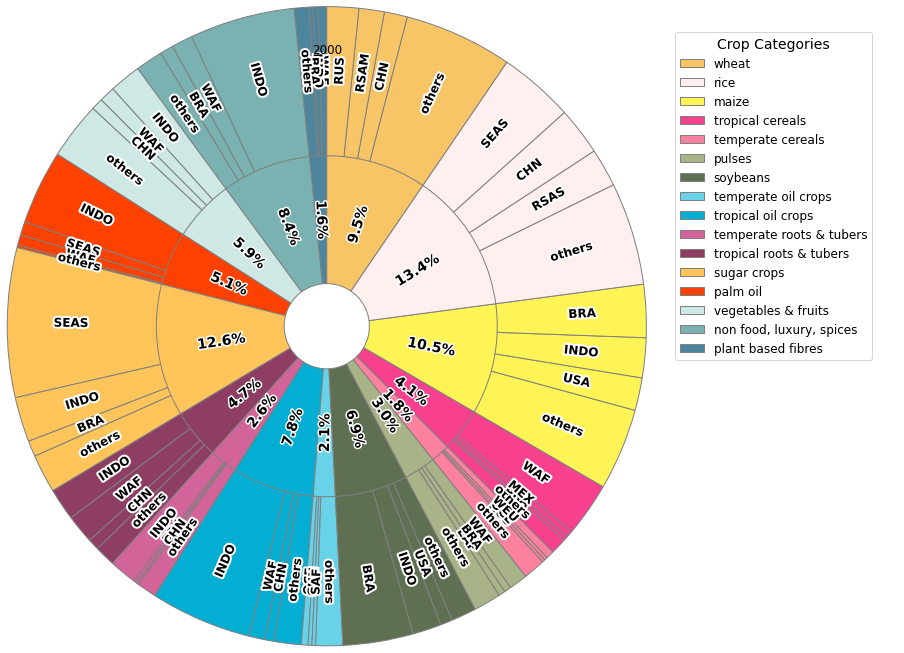

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


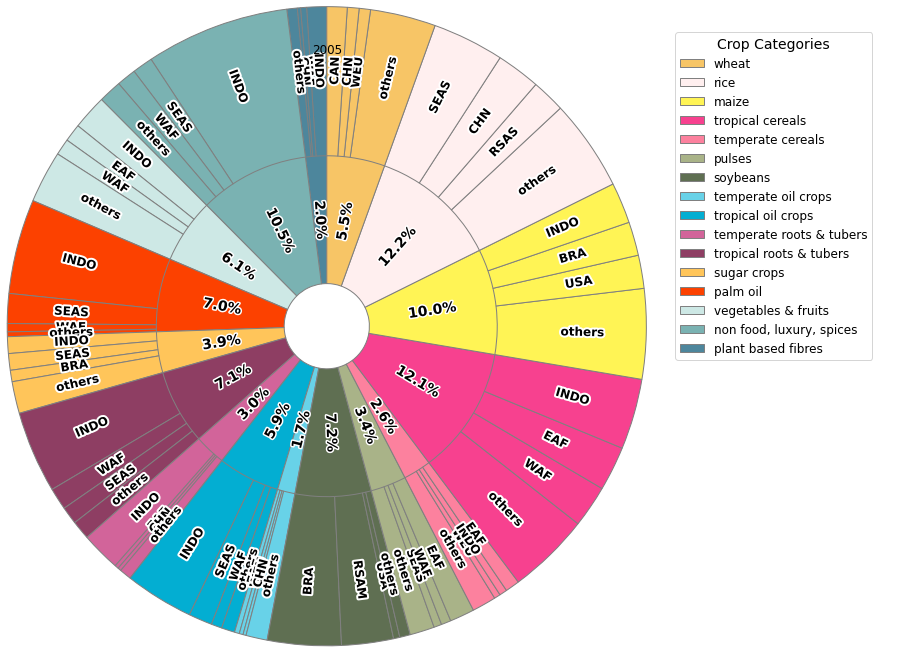

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


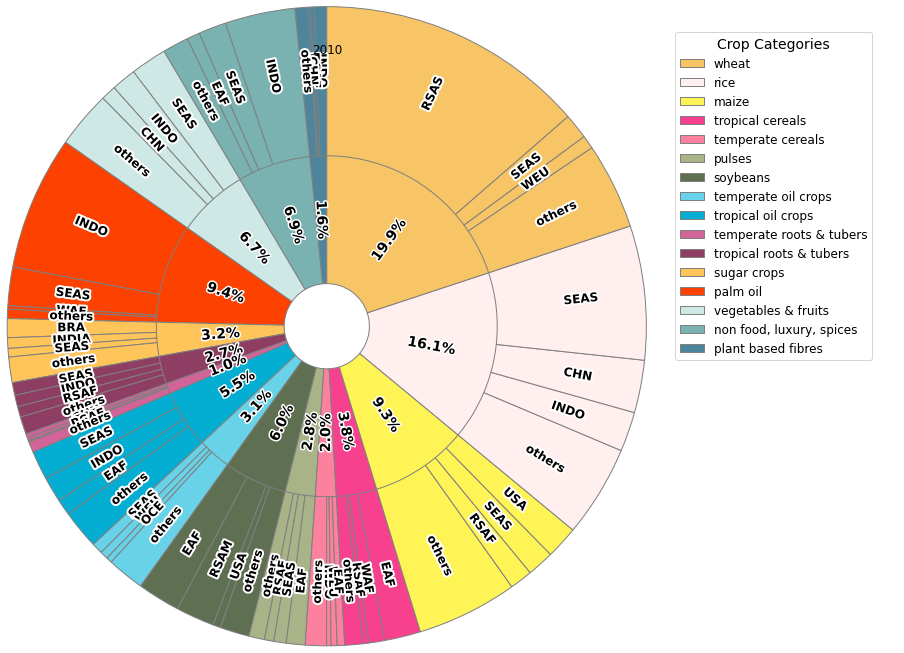

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


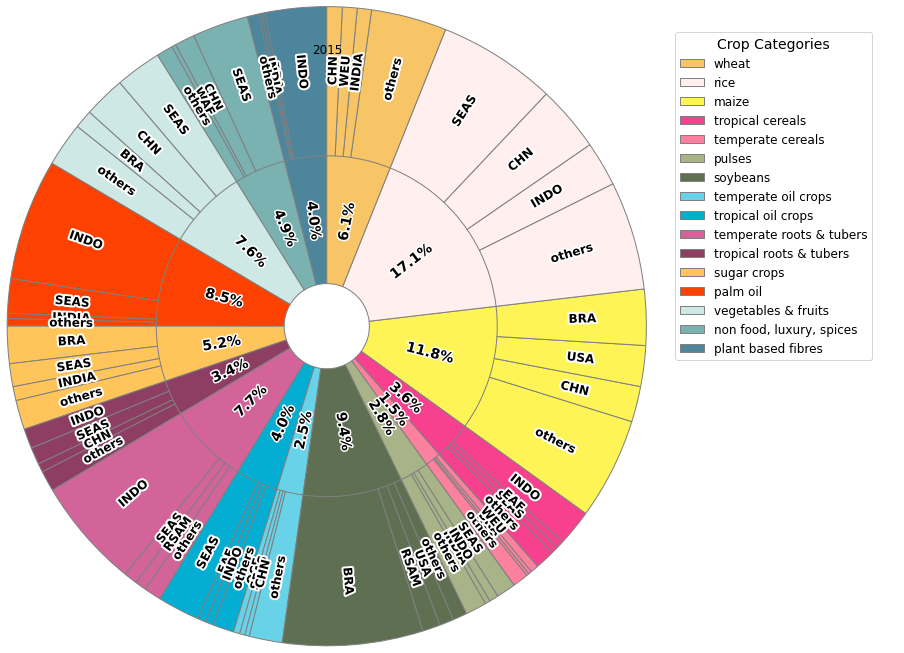

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


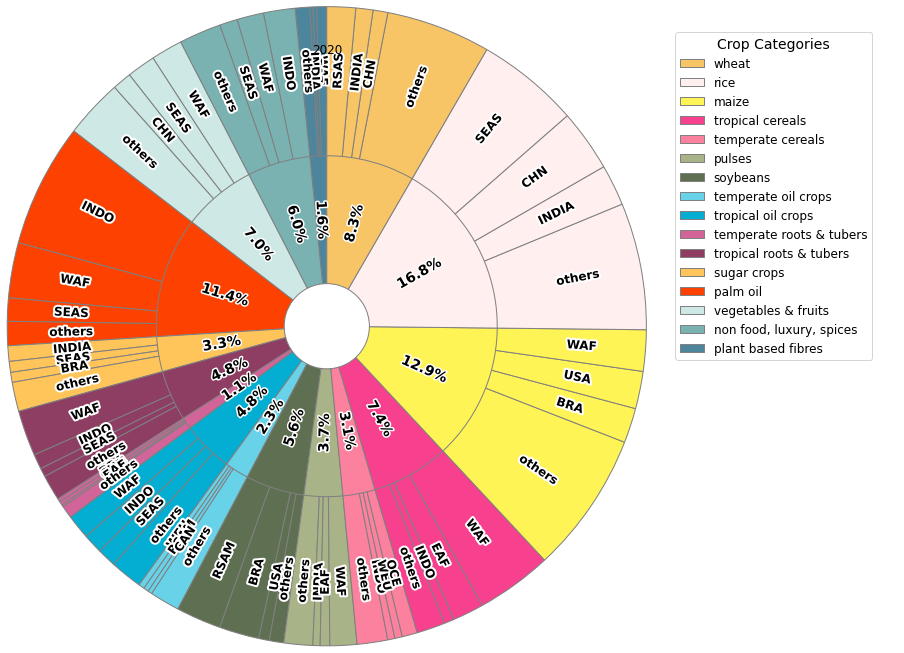

In [13]:
df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_LUC_melt.loc[:, 'emissions'] = "LUC"

df_AGRI_melt = df_AGRI.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_AGRI_melt.loc[:, 'emissions'] = "AGRI"

data_2kategori = pd.concat([df_LUC_melt, df_AGRI_melt], ignore_index=True)
data_2kategori_drop = data_2kategori.drop(columns=['emissions'])
data_2kategori_sum = data_2kategori_drop.groupby(columns).sum()
data_2kategori_sum = data_2kategori_sum.reset_index()

region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()
data_2kategori_sum['IMAGE Region Name'] = data_2kategori_sum['IMAGE Region Name'].map(region_code_map)

for time in range(start_year, end_year, 5):
    # Convert the data into a DataFrame
    df = data_2kategori_sum[data_2kategori_sum['time'] == time]

    # Keep only top 3 values for each category
    df_top3 = get_top_n(df, 'NGFBFC', 'value', 3)

    # Calculate the total for each NGFBFC in the original DataFrame
    total_per_NGFBFC = df.groupby('NGFBFC')['value'].sum().reset_index()

    # Calculate the total for top 3
    total_top3 = df_top3.groupby('NGFBFC')['value'].sum().reset_index()

    # Calculate the others by subtracting top 3 from the total
    df_others_sum = total_per_NGFBFC.merge(total_top3, on='NGFBFC', how='left', suffixes=('', '_top3'))
    df_others_sum['value'] = df_others_sum['value'] - df_others_sum['value_top3'].fillna(0)
    df_others_sum = df_others_sum[df_others_sum['value'] > 0]  # Keep only positive values
    df_others_sum['IMAGE Region Name'] = "others"

    # Combine top 3 and others
    df_combined = pd.concat([df_top3, df_others_sum[['NGFBFC', 'value', 'IMAGE Region Name']]], ignore_index=True)
    df_combined = df_combined[df_combined['NGFBFC'] != 'pasture']

    # Sorting the data to match the order of colors in the legend
    df_combined['color_order'] = df_combined['NGFBFC'].map(lambda x: list(colors.keys()).index(x) if x in colors else len(colors))
    df_combined = df_combined.sort_values('color_order').drop('color_order', axis=1)

    # Ring 1: Total per NGFBFC
    ring1_data = df_combined.groupby('NGFBFC')['value'].sum()
    ring1_labels = list(colors.keys())
    ring1_data = ring1_data.reindex(ring1_labels)
    ring1_colors = [colors[label] for label in ring1_labels]

    # Calculate percentages for ring 1
    ring1_percent = ring1_data / ring1_data.sum() * 100

    # Calculate initial ring2_data
    ring2_data = df_combined.groupby(['NGFBFC', 'IMAGE Region Name'])['value'].sum()

    # Sort data within each NGFBFC while preserving MultiIndex
    NGFBFCs_list = list(colors.keys())
    final_data = []

    for NGFBFC_name in NGFBFCs_list:
        if NGFBFC_name in ring2_data.index.get_level_values(0):
            NGFBFC_data = ring2_data.xs(NGFBFC_name)
            angle = get_angular_position(NGFBFC_name, NGFBFCs_list)
            
            # Extract and sort non-others data
            others_value = NGFBFC_data['others'] if 'others' in NGFBFC_data.index else None
            non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=False)
            
            # Create sorted data based on angular position
            if 300 <= angle or angle <= 70:
                non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=True)
                # For upper half, others goes first
                if others_value is not None:
                    regions = ['others'] + non_others.index.tolist()
                    values = [others_value] + non_others.values.tolist()
                else:
                    regions = non_others.index.tolist()
                    values = non_others.values.tolist()
            else:
                # For lower half, others goes last
                if others_value is not None:
                    regions = non_others.index.tolist() + ['others']
                    values = non_others.values.tolist() + [others_value]
                else:
                    regions = non_others.index.tolist()
                    values = non_others.values.tolist()
            
            # Create MultiIndex entries for this NGFBFC
            for region, value in zip(regions, values):
                final_data.append(((NGFBFC_name, region), value))

    # Convert to Series with MultiIndex
    ring2_data = pd.Series(dict(final_data))
    ring2_labels = ring2_data.index.get_level_values(1)

    # Update ring2_colors to match the new ordering
    ring2_colors = []
    for NGFBFC_name in colors.keys():
        if NGFBFC_name in ring2_data.index.get_level_values(0):
            NGFBFC_data = ring2_data.xs(NGFBFC_name)
            ring2_colors.extend([colors[NGFBFC_name]] * len(NGFBFC_data))

    # Plotting
    # Create Figure and GridSpec Layout
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.2, wspace=0.2, width_ratios=[7,3], height_ratios=[7,3])
    ax = fig.add_subplot(gs[:, 0], aspect="equal")

    plt.title(f"{time}")

    # Plot the inner ring
    inner_pie, _ = ax.pie(ring1_data, radius=1.2, colors=ring1_colors, 
                        wedgeprops=dict(width=1, edgecolor='#808080'), startangle=90)

    # Plot the outer ring
    outer_pie, _ = ax.pie(ring2_data, radius=1.5, colors=ring2_colors, 
                        wedgeprops=dict(width=0.7, edgecolor='#808080'), startangle=90)

    # Add text annotations for the inner ring
    for i, (label, percent) in enumerate(zip(ring1_labels, ring1_percent)):
        ang = (inner_pie[i].theta2 + inner_pie[i].theta1) / 2
        x = 0.5 * np.cos(np.deg2rad(ang))
        y = 0.5 * np.sin(np.deg2rad(ang))
        rotation = ang + 180 if 90 <= ang <= 270 else ang
        ax.text(x, y, f'{percent:.1f}%', ha='center', va='center', rotation=rotation, 
                color='black', fontsize=14, fontweight='bold',
                path_effects=[path_effects.Stroke(linewidth=3, foreground='white'), 
                            path_effects.Normal()])

    # Add text annotations for the outer ring
    for i, label in enumerate(ring2_labels):
        ang = (outer_pie[i].theta2 + outer_pie[i].theta1) / 2
        x = 1.2 * np.cos(np.deg2rad(ang))
        y = 1.2 * np.sin(np.deg2rad(ang))
        rotation = ang + 180 if 90 <= ang <= 270 else ang
        ax.text(x, y, f'{label}', ha='center', va='center', rotation=rotation,
                color='black', fontsize=12, fontweight='bold',
                path_effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                            path_effects.Normal()])

    # Adding legend
    legend_handles = [plt.Rectangle((0, 0), 1, 1, edgecolor='#808080', facecolor=color) for color in dict(reversed(colors.items())).values()]
    
    # Menambahkan legend ke kuadran kanan atas
    legend_ax = fig.add_subplot(gs[0, 1])
    legend_ax.axis('off')  # Sembunyikan sumbu
    legend_ax.legend(handles=legend_handles,
            labels=[label for label in dict(reversed(colors.items())).keys()],
            title="Crop Categories", title_fontsize=14,
            bbox_to_anchor=(0,0.1), loc="lower left", fontsize=12)

    plt.show()

C:\Users\HEFRYA~1\AppData\Local\Temp/ipykernel_15912/1417490595.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(category_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)


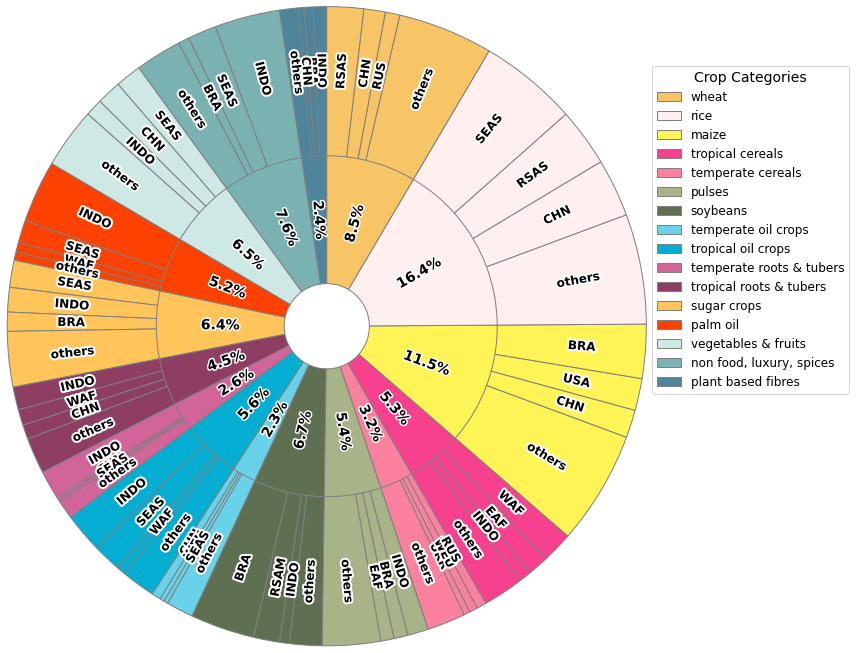

In [14]:
df_AGRI_melt = df_AGRI.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_AGRI_melt = df_AGRI_melt.drop(columns=['time'])
df_AGRI_groupby = df_AGRI_melt.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_AGRI_index = df_AGRI_groupby.reset_index()
df_AGRI_index.loc[:, 'emissions'] = "AGRI"

df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'NGFBFC'], var_name='time', value_name='value')
df_LUC_melt = df_LUC_melt.drop(columns=['time'])
df_LUC_groupby = df_LUC_melt.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
df_LUC_index = df_LUC_groupby.reset_index()
df_LUC_index.loc[:, 'emissions'] = "LUC"

data_2kategori = pd.concat([df_AGRI_index, df_LUC_index], ignore_index=True)

LU_years = pd.concat([df_AGRI, df_LUC], ignore_index=True)
LU_years_groupby = LU_years.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
LU_years_groupby_index = LU_years_groupby.reset_index()

data_2kategori_drop = data_2kategori.drop(columns=['emissions'])
data_2kategori_sum = data_2kategori_drop.groupby(['IMAGE Region Name', 'NGFBFC']).sum()
data_2kategori_sum = data_2kategori_sum.reset_index()

region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()

data_2kategori_sum['IMAGE Region Name'] = data_2kategori_sum['IMAGE Region Name'].map(region_code_map)

# Convert the data into a DataFrame
df = data_2kategori_sum

# Keep only top 3 values for each category
df_top3 = get_top_n(df, 'NGFBFC', 'value', 3)

# Calculate the total for each NGFBFC in the original DataFrame
total_per_NGFBFC = df.groupby('NGFBFC')['value'].sum().reset_index()

# Calculate the total for top 3
total_top3 = df_top3.groupby('NGFBFC')['value'].sum().reset_index()

# Calculate the others by subtracting top 3 from the total
df_others_sum = total_per_NGFBFC.merge(total_top3, on='NGFBFC', how='left', suffixes=('', '_top3'))
df_others_sum['value'] = df_others_sum['value'] - df_others_sum['value_top3'].fillna(0)
df_others_sum = df_others_sum[df_others_sum['value'] > 0]  # Keep only positive values
df_others_sum['IMAGE Region Name'] = "others"

# Combine top 3 and others
df_combined = pd.concat([df_top3, df_others_sum[['NGFBFC', 'value', 'IMAGE Region Name']]], ignore_index=True)
df_combined = df_combined[df_combined['NGFBFC'] != 'grass']

# Sorting the data to match the order of colors in the legend
df_combined['color_order'] = df_combined['NGFBFC'].map(lambda x: list(colors.keys()).index(x))
df_combined = df_combined.sort_values('color_order').drop('color_order', axis=1)

# Ring 1: Total per NGFBFC
ring1_data = df_combined.groupby('NGFBFC')['value'].sum()
ring1_labels = list(colors.keys())
ring1_data = ring1_data.reindex(ring1_labels)
ring1_colors = [colors[label] for label in ring1_labels]

# Calculate percentages for ring 1
ring1_percent = ring1_data / ring1_data.sum() * 100

# Ring 2: Regions within each NGFBFC
ring2_data = df_combined.groupby(['NGFBFC', 'IMAGE Region Name'])['value'].sum()

# Sort data within each NGFBFC while preserving MultiIndex
NGFBFCs_list = list(colors.keys())
final_data = []

for NGFBFC_name in NGFBFCs_list:
    if NGFBFC_name in ring2_data.index.get_level_values(0):
        NGFBFC_data = ring2_data.xs(NGFBFC_name)
        angle = get_angular_position(NGFBFC_name, NGFBFCs_list)
        
        # Extract and sort non-others data
        others_value = NGFBFC_data['others'] if 'others' in NGFBFC_data.index else None
        non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=False)
        
        # Create sorted data based on angular position
        if 300 <= angle or angle <= 70:
            non_others = NGFBFC_data[NGFBFC_data.index != 'others'].sort_values(ascending=True)
            # For upper half, others goes first
            if others_value is not None:
                regions = ['others'] + non_others.index.tolist()
                values = [others_value] + non_others.values.tolist()
            else:
                regions = non_others.index.tolist()
                values = non_others.values.tolist()
        else:
            # For lower half, others goes last
            if others_value is not None:
                regions = non_others.index.tolist() + ['others']
                values = non_others.values.tolist() + [others_value]
            else:
                regions = non_others.index.tolist()
                values = non_others.values.tolist()
        
        # Create MultiIndex entries for this NGFBFC
        for region, value in zip(regions, values):
            final_data.append(((NGFBFC_name, region), value))

# Convert to Series with MultiIndex
ring2_data = pd.Series(dict(final_data))
ring2_labels = ring2_data.index.get_level_values(1)

# Update ring2_colors to match the new ordering
ring2_colors = []
for NGFBFC_name in colors.keys():
    if NGFBFC_name in ring2_data.index.get_level_values(0):
        NGFBFC_data = ring2_data.xs(NGFBFC_name)
        ring2_colors.extend([colors[NGFBFC_name]] * len(NGFBFC_data))

# Plotting
# Create Figure and GridSpec Layout
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.2, wspace=0.2, width_ratios=[7,3], height_ratios=[7,3])
ax = fig.add_subplot(gs[:, 0], aspect="equal")

# Plot the inner ring
inner_pie, _ = ax.pie(ring1_data, radius=1.2, colors=ring1_colors, 
                    wedgeprops=dict(width=1, edgecolor='#808080'), startangle=90)

# Plot the outer ring
outer_pie, _ = ax.pie(ring2_data, radius=1.5, colors=ring2_colors, 
                    wedgeprops=dict(width=0.7, edgecolor='#808080'), startangle=90)

# Add text annotations for the inner ring
for i, (label, percent) in enumerate(zip(ring1_labels, ring1_percent)):
    ang = (inner_pie[i].theta2 + inner_pie[i].theta1) / 2
    x = 0.5 * np.cos(np.deg2rad(ang))
    y = 0.5 * np.sin(np.deg2rad(ang))
    rotation = ang + 180 if 90 <= ang <= 270 else ang
    ax.text(x, y, f'{percent:.1f}%', ha='center', va='center', rotation=rotation, 
            color='black', fontsize=14, fontweight='bold',
            path_effects=[path_effects.Stroke(linewidth=3, foreground='white'), 
                        path_effects.Normal()])

# Add text annotations for the outer ring
for i, label in enumerate(ring2_labels):
    ang = (outer_pie[i].theta2 + outer_pie[i].theta1) / 2
    x = 1.2 * np.cos(np.deg2rad(ang))
    y = 1.2 * np.sin(np.deg2rad(ang))
    rotation = ang + 180 if 90 <= ang <= 270 else ang
    ax.text(x, y, f'{label}', ha='center', va='center', rotation=rotation,
            color='black', fontsize=12, fontweight='bold',
            path_effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                        path_effects.Normal()])
        
legend_handles = [plt.Rectangle((0, 0), 1, 1, edgecolor='#808080', facecolor=color) for color in dict(reversed(colors.items())).values()]
plt.legend(handles=legend_handles,
           labels=[label for label in dict(reversed(colors.items())).keys()],
           title="Crop Categories",title_fontsize=14,
           bbox_to_anchor=(1.1, 1), loc="upper left", fontsize=12)


plt.show()
